In [150]:
import numpy as np
import matplotlib.pyplot as plt

count = 1

class CosineSimilarityTree:
    def __init__(self, data, threshold):
        self.threshold = threshold
        self.root = self.build_tree(data)
        
    class Node:
        def __init__(self, data):
            self.data = data
            self.left = None
            self.right = None
        
    def build_tree(self, data):
        if len(data) == 0:
            return None
        root = self.Node(data[0])
        left_data, right_data = [], []
        for i in range(1, len(data)):
            cosine_similarity = self.calculate_cosine_similarity(data[i], root.data)
            if cosine_similarity <= self.threshold:
                left_data.append(data[i])
            else:
                right_data.append(data[i])
        root.left = self.build_tree(left_data)
        root.right = self.build_tree(right_data)
        return root
    
    def calculate_cosine_similarity(self, a, b):
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        return dot_product / (norm_a * norm_b)
    
    def plot(self):
        plt.figure()
        self.plot_node(self.root, 0, 100, 0)
        plt.axis('off')
        plt.show()
        
    def plot_node(self, node, x_start, x_end, y_start):
        global count
        if node is None:
            return
        x = (x_start + x_end) / 2
        print(x, y_start)
        y = y_start + 3
        plt.plot(x, y_start, 'ko', markersize=5) # 在画面上方中央画Root

        plt.text(x, y_start + 2, str(count))
        count += 1

        if node.left is not None:
            self.plot_node(node.left, x_start, x, y)
            plt.plot([x, (x+x_start) / 2], [y_start, y], linewidth=2, color='r') #(x, y_start)到((x+x_start)/2, y)
        if node.right is not None:
            self.plot_node(node.right, x, x_end, y)
            plt.plot([x, (x+x_end) / 2], [y_start, y], linewidth=2, color='g')#(x, y_start)到((x+x_end)/2, y)
            

In [151]:
# Generate random data
num_samples = 100
data_dimension = 10
data = np.random.randn(num_samples, data_dimension)

np.insert(data, 0, [0 for i in range(data_dimension)])

# Generate random threshold
threshold = 0.4

# # Print generated data
# print("Data:")
# print(data)
# print("Targets:")
# print(targets)
# print("Threshold:", threshold)
tree = CosineSimilarityTree(data, threshold)

50.0 0
25.0 3
12.5 6
6.25 9
3.125 12
1.5625 15
0.78125 18
9.375 12
18.75 9
75.0 3


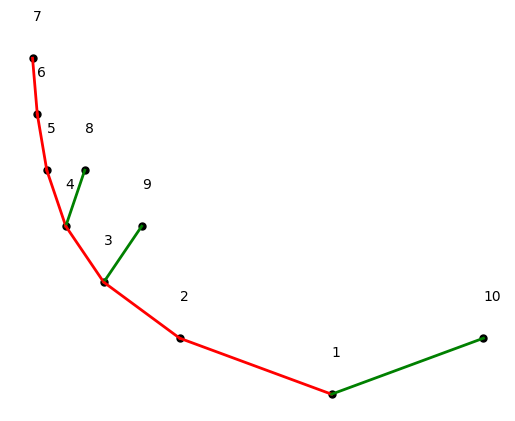

In [152]:
tree.plot()